<center><h1>Computational Statistics:</h1></center>
<center><h1>Inspection Paradox</h1></center>

<center>We'll try to answer the eternal question:</center>
<center>Why are your friends are more popular than you?</center>

Preview
-----

- Summary statistics do not always capture people's experience

<center><h2>School advertise small class sizes, <br>but students complain about how large their classes are.</h2></center>

<center><h2>Who is right?</h2></center>

In [14]:
reset -fs

In [15]:
from random import expovariate

In [16]:
class_size = 30
sizes = [expovariate(1/class_size) for _ in range(1_000)]

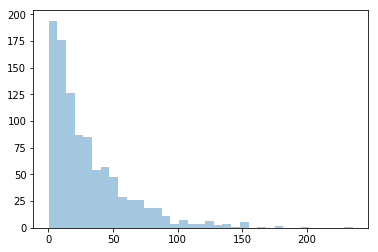

In [17]:
import seaborn as sns

palette = "Dark2"
%matplotlib inline

sns.distplot(sizes, kde=False);

In [18]:
# What is the average class size?
from statistics import mean

mean_class_size = mean(sizes)
print(f"{mean_class_size:.2f}")

30.86


In [19]:
# What is the student's experience?
from random import choices

student_experience = choices(sizes, weights=sizes, k=len(sizes))
mean_student_experience = mean(student_experience)
print(f"{mean_student_experience:.2f}")

61.10


<center><h2>What is happening?</h2></center>

Inspection paradox - Larger classes are more likely be sampled by students than smaller classes.

This is also why __your__ bus wait is more likely to be longer than the __average__ bus weight time.

<center><h2>Did I cheat by sampling from the exponential. <br>What about other distributions?</h2></center>

In [20]:
def actual_vs_perception(class_size, distribution_name, **distrubtion_params):
    
    sizes = [distribution_name(**distrubtion_params) for _ in range(10_000)]
    mean_class_size = mean(sizes)
    print(f"The actual mean class size is: {mean_class_size:>8.2f}")

    student_experience = choices(sizes, weights=sizes, k=len(sizes))
    mean_student_experience = mean(student_experience)
    print(f"The perceived mean class size is: {mean_student_experience:>5.2f}")

The software engineer in me wants to write tests.

In [21]:
actual_vs_perception(class_size=30, distribution_name=expovariate, lambd=1/class_size)

The actual mean class size is:    29.74
The perceived mean class size is: 58.59


In [22]:
from random import gauss

actual_vs_perception(class_size=30, distribution_name=gauss, mu=class_size, sigma=10)

The actual mean class size is:    29.98
The perceived mean class size is: 33.09


In [23]:
from random import uniform

actual_vs_perception(class_size=30, distribution_name=uniform, a=15, b=45)

The actual mean class size is:    29.90
The perceived mean class size is: 32.39


The effect is more pronounced with the exponential but present in most distributions.

<center><h2>Statistics are a defense against human cognitive biases.</h2></center>

<center><h2>Student activity: Answer the following question …</h2></center>
<center><h2>Why are you less popular than your friends?</h2></center>
<br>

<center><h2>Think, pair, share</h2></center>

Review
-----

- Summary statistics can be misleading. 
- We use simulation to understand the human experience.
- Statistics and programming can help structure reasoning.


Sources
-----

Renewal theory https://en.wikipedia.org/wiki/Renewal_theory

http://ben-israel.rutgers.edu/711/Ross-Inspection.pdf

http://allendowney.blogspot.com/2015/08/the-inspection-paradox-is-everywhere.html

https://twitter.com/raymondh/status/1056774933471145984

https://www.scientificamerican.com/article/why-youre-probably-less-popular/

http://jakevdp.github.io/blog/2018/09/13/waiting-time-paradox/

Book: [Mindware: Tools for Smart Thinking](https://www.amazon.com/Mindware-Tools-Thinking-Richard-Nisbett/dp/1511357193)